In [4]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('spam.csv', encoding='latin1') # Importing dataset

In [6]:
df.sample(5) # Random 5 rows displayed

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1013,ham,Just buy a pizza. Meat lovers or supreme. U ge...,NaN,NaN,NaN
4147,spam,Please call Amanda with regard to renewing or ...,NaN,NaN,NaN
3850,ham,We have all rounder:)so not required:),NaN,NaN,NaN
2562,ham,"Yeah I am, so I'll leave maybe 7ish?",NaN,NaN,NaN
122,spam,Todays Voda numbers ending 7548 are selected t...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

## Data Cleaning 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
# drop last 3 columns as they have mostly null values and of no importance
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(5) 

,v1,v2
830,spam,U have a secret admirer. REVEAL who thinks U R...
2775,ham,We confirm eating at esplanade?
4355,ham,Great. So should i send you my account number.
2696,ham,Nope but i'm going home now then go pump petro...
3461,spam,Bloomberg -Message center +447797706009 Why wa...


In [11]:
# columns name v1 and v2 are not descriptive thus renaming them
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
570,ham,Yar lor wait 4 my mum 2 finish sch then have l...
2152,ham,Hi kindly give us back our documents which we ...
4210,ham,Oi when you gonna ring
2741,spam,I don't know u and u don't know me. Send CHAT ...
2728,spam,Urgent Please call 09066612661 from landline. ...


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
# encoding target values
encoder=LabelEncoder()
df['target']= encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum() # checking for missing values

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

403

In [17]:
# removing duplicate values
df=df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## EDA

In [20]:
# Analysing how much spam and ham data are there
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

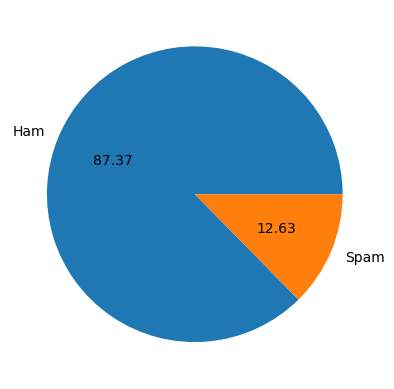

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f')
plt.show()
#This shows data is imbalanced, no. of ham>>> no.of spam

In [22]:
import nltk
# counting no. of chars in each message and storing in a new column
df['num_characters']= df['text'].apply(len) 

In [23]:
# displaying all the words in each message 
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [24]:
# using len func on the list of words we got to calculate total words in each message and storing in column
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x))) 

In [25]:
# using len func on the list of sentences we got to calculate total no.of sentence in each message and storing in column
df['num_sentence']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
#analysing statistical info about columns
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
# analysing statistical info for ham messages
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
# analysing statistical info for spam messages
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

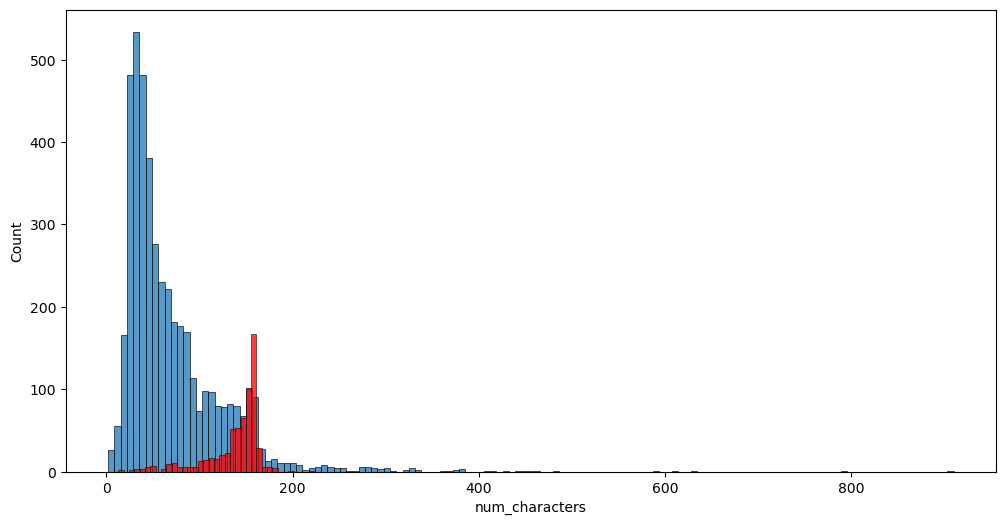

In [31]:
# visualizing no.of characters in ham and spam messages
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters']) # for ham
sns.histplot(df[df['target']==1]['num_characters'],color='r') # for spam
# this shows that spam messages have more no.of characters than in ham messages

<AxesSubplot:xlabel='num_words', ylabel='Count'>

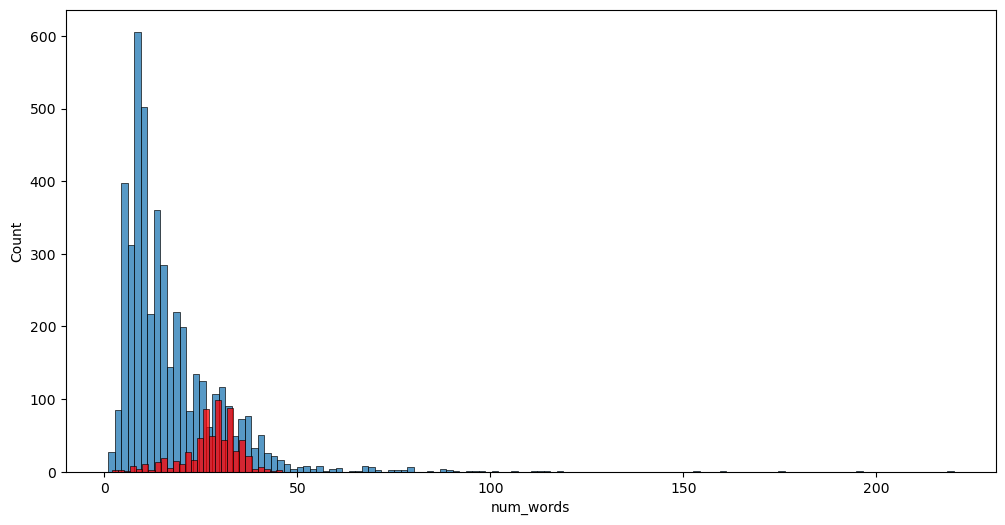

In [32]:
# visualizing no.of words in ham and spam messages
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words']) # for ham
sns.histplot(df[df['target']==1]['num_words'],color='r') # for spam
# this shows that spam messages have more no.of words than in ham messages

<AxesSubplot:xlabel='num_sentence', ylabel='Count'>

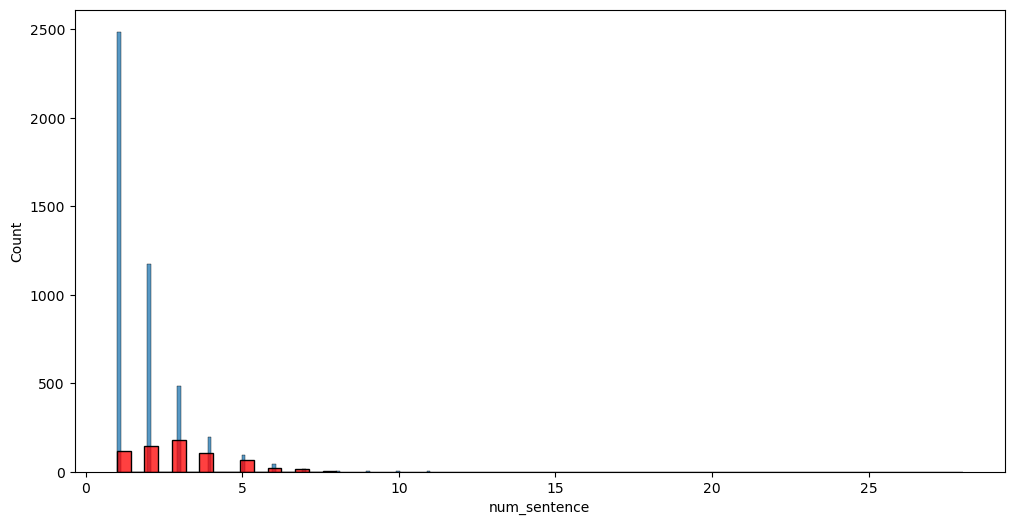

In [33]:
# visualizing no.of sentences in ham and spam messages
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentence']) # for ham
sns.histplot(df[df['target']==1]['num_sentence'],color='r') # for spam

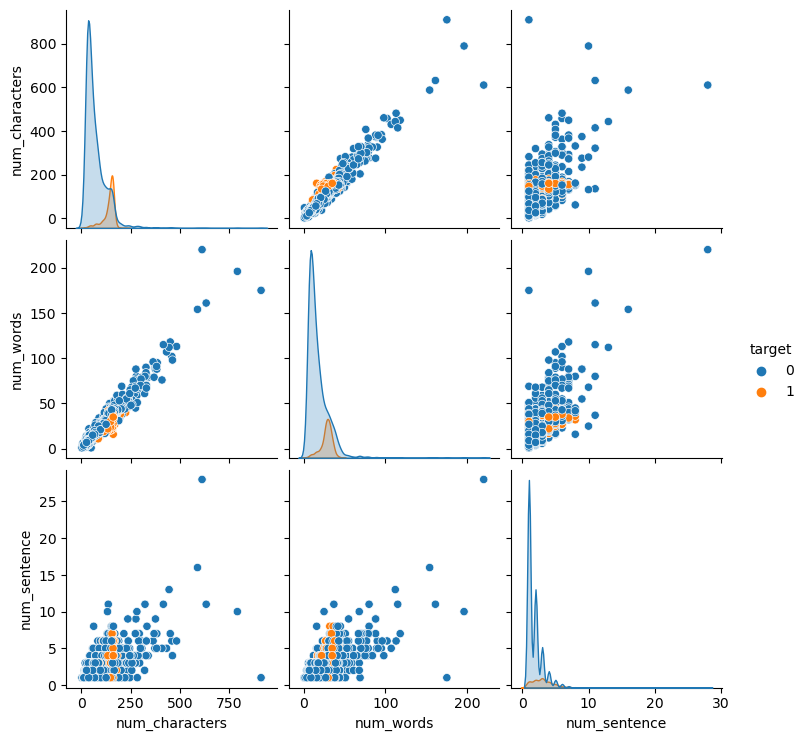

In [34]:
# Visualizing correlation between columns like relation between no.of words and no.of sentences
sns.pairplot(df,hue='target')

<AxesSubplot:>

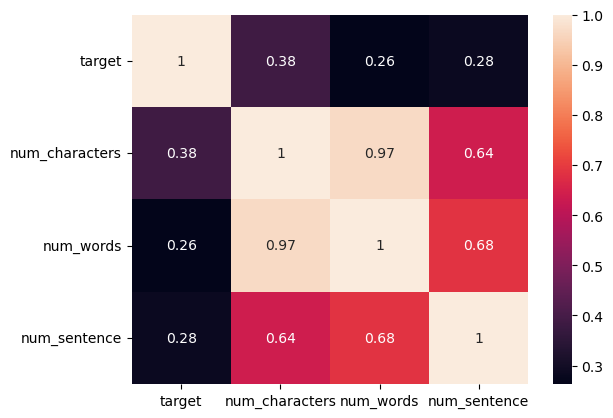

In [35]:
# correlation between target and no.of words,chars,sentences
sns.heatmap(df.corr(),annot=True)
# this shows there is strong correlation between columns

## Data Preprocessing / Text Preprocessing
### 1.Lower Case
### 2. Tokenization
### 3.Removing special chars
### 4. Removing stop words and punctuations
### 5. Stemming

In [36]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [37]:
stopwords.words('english') # these are all the stop words in english language

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
string.punctuation # all the punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
# Created one function that does all text preprocessing in one go
def transform_text(text):
    # 1.for lower case
    text=text.lower()
    # 2.Tokenization
    text=nltk.word_tokenize(text)
    # 3. empty list created to store only alpha numeric and removing special characters
    y=[] 
    for word in text:
        if word.isalnum():
            y.append(word)
    text=y[:]# cloning y in text copying y in text bcoz it is immutable thus direct assigning is not done
    y.clear()# empty the list y
    # 4.Removing stop words and punctuations
    for word in text: 
        if  word not in stopwords.words('english') and word not in string.punctuation:
            y.append(word)
    text=y[:]# cloning y in text copying y in text bcoz it is immutable thus direct assigning is not done
    y.clear()# empty the list y
    # 5. Stemming
    for word in text:
        ps=PorterStemmer()# object created
        y.append(ps.stem(word))
        
    return " ".join(y) # converting list into string 

In [40]:
df['transformed_text']=df['text'].apply(transform_text)

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
# Creating WordCloud for visualizing the most frequent words and significance in spam and ham messages 
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [43]:
# Word cloud for spam messages
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

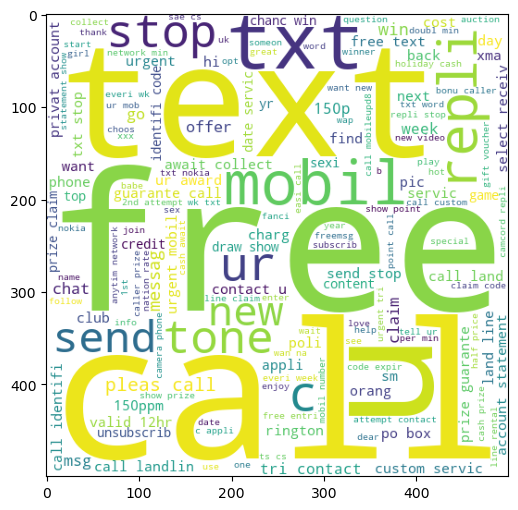

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [45]:
# Word cloud for ham messages
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

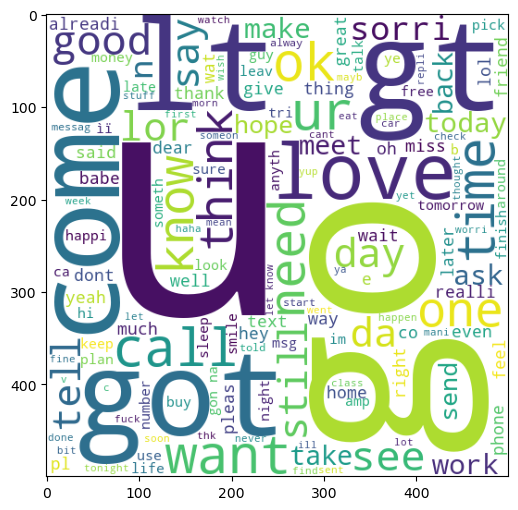

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [47]:
#Extracting top 30 words that occured in spam and ham messages

df[df['target']==1]['transformed_text'].to_list()# this gives a list of spam messages 

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [48]:
spam_corpus=[] # empty list created to store all the words in spam messages
for msg in   df[df['target']==1]['transformed_text'].to_list():
    for word in msg.split():
        spam_corpus.append(word)
        

In [49]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [50]:
len(spam_corpus)

9939

In [51]:
from collections import Counter
Counter(spam_corpus) # this gives a dictionary of words in spam_corpus and their count

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [52]:
# top 30 words occuring in spam mesages 
pd.DataFrame(Counter(spam_corpus).most_common(30)) 

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


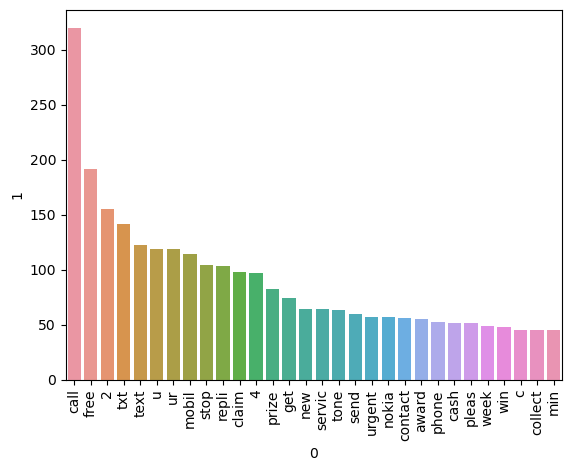

In [53]:
# plotting a bar plot to visualize top 30 words in spam messages
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
ham_corpus=[] # empty list created to store all the words in ham messages
for msg in df[df['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_corpus.append(word)
ham_corpus       
        

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [56]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


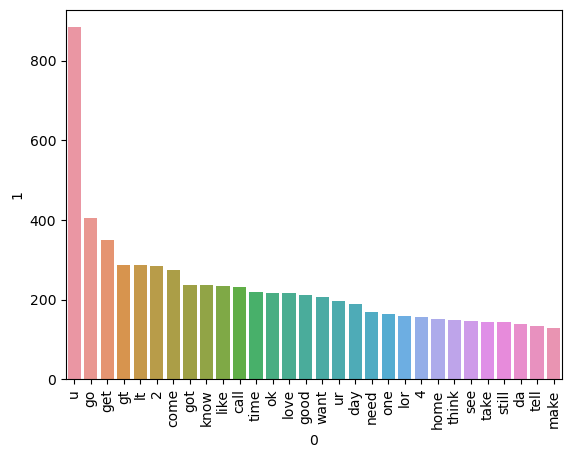

In [57]:
# plotting a bar plot to visualize top 30 words in ham messages
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [163]:
# ML models works best with numerical data , thus we need to convert transformed_text into numbers
# Thus we first use BagOfWords method to do so 
# Then we use TF-IDF method later
from sklearn.feature_extraction.text import CountVectorizer,  TfidfVectorizer
cv=CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [109]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [110]:
X.shape

(5169, 6708)

In [111]:
Y=df['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=2)

In [114]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [115]:
# there are varous types of NaiveBayes algo, creating objects of different algos
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [116]:
# Using gaussian naive bayes 
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)

In [117]:
# Performance metrics of GNB
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [118]:
# Using multinomial naive bayes 
mnb.fit(X_train,Y_train)
Y_pred2=mnb.predict(X_test)

In [119]:
# Performance metrics of MNB
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [120]:
# Using bernoulli naive bayes 
bnb.fit(X_train,Y_train)
Y_pred3=bnb.predict(X_test)

In [121]:
# Performance metrics of BNB
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [164]:
# Now using TF_IDF 
X1=tfidf.fit_transform(df['transformed_text']).toarray()

In [147]:
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [165]:
X1.shape

(5169, 3000)

In [166]:
Y=df['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [167]:
X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y,test_size=0.20,random_state=2)

In [126]:
#Applying GNB on TF_IDF
gnb.fit(X1_train,Y1_train)
Y1_pred1 = gnb.predict(X1_test)
print(accuracy_score(Y1_test,Y1_pred1))
print(confusion_matrix(Y1_test,Y1_pred1))
print(precision_score(Y1_test,Y1_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [168]:
#Applying MNB on TF_IDF
mnb.fit(X1_train,Y1_train)
Y1_pred2=mnb.predict(X1_test)
print(accuracy_score(Y1_test,Y1_pred2))
print(confusion_matrix(Y1_test,Y1_pred2))
print(precision_score(Y1_test,Y1_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [128]:
#Applying BNB on TF_IDF
bnb.fit(X1_train,Y1_train)
Y1_pred3=bnb.predict(X1_test)
print(accuracy_score(Y1_test,Y1_pred3))
print(confusion_matrix(Y1_test,Y1_pred3))
print(precision_score(Y1_test,Y1_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


#### After analyzing multiple NB with BoW and TF_IDF best performance metrics and preicion_score is with 
#### TF_IDF --> Multinomial Naive Bayes(MNB) thus selecting this 

In [86]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 99.8/99.8 MB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Now training other models for comparision

In [129]:
# importing major classification models for training
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [130]:
# Creating intances of all models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [131]:
# Craeting a dictionary containing name of algos and their instances
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [132]:
# Function to train different model passed as parameter and returns performance metrics
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [133]:
# using function on SVC
train_classifier(svc,X1_train,Y1_train,X1_test,Y1_test)

(0.9758220502901354, 0.9747899159663865)

In [134]:
pip install --upgrade scikit-learn scipy

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 11.0/11.0 MB 12.3 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 8.3 MB/s eta 0:00:00
     --------------------------------------- 15.8/15.8 MB 10.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.


In [135]:
# Now executing function on every algo in dictionary clfs and storing performance metrics for each algo
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X1_train,Y1_train,X1_test,Y1_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.9256198347107438


In [136]:
# Craeting a data frame of algos and their accuracy and precision
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [137]:
# Sorting the algos based on decresing precision
performance_df.sort_values('Precision', ascending=False)

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.966151,0.925620
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [138]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [139]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.970986
3,DT,Accuracy,0.927466
4,LR,Accuracy,0.958414
5,RF,Accuracy,0.974855
6,AdaBoost,Accuracy,0.960348
7,BgC,Accuracy,0.957447
8,ETC,Accuracy,0.974855
9,GBDT,Accuracy,0.947776


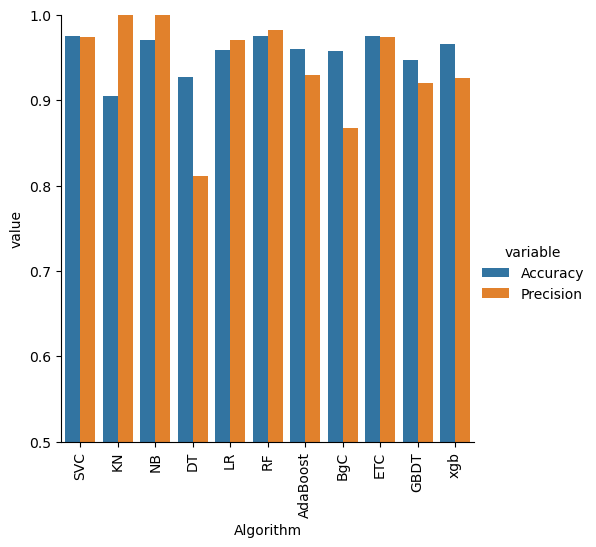

In [140]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### Improvising Model

In [ ]:
# We will set max_features of TfIdf in above such that all words are not used for vectorization

In [141]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [142]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [143]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [144]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [145]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [146]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
1,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
2,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
3,DT,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881
4,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
5,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,BgC,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188
8,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
9,GBDT,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000


In [ ]:
# Naive Bayes accuracy improved after setting max_features parameter in tfidf vectorization
#Scaling X1 doesnt gave any better change thus we removed scaling
# Appending num_chars feature in input and testing again but no improvement seen 

In [151]:
#Using VOTING CLASSIFIER
# Combining our best models to achieve higher accuracy 
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [152]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [153]:
voting.fit(X1_train,Y1_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [154]:
Y_pred_V=voting.predict(X1_test)
print('Accuracy',accuracy_score(Y1_test,Y_pred_V))
print('Precision',precision_score(Y1_test,Y_pred_V))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [155]:
# after using ensemble technique we see that precision is decreased as naive bayes as it was 100%

In [156]:
# Stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [157]:
from sklearn.ensemble import StackingClassifier

In [158]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [159]:
clf.fit(X1_train,Y1_train)
Y_pred_Stack = clf.predict(X1_test)
print('Accuracy', accuracy_score(Y1_test,Y_pred_Stack))
print('Precision',precision_score(Y1_test,Y_pred_Stack))

Accuracy 0.9787234042553191
Precision 0.9328358208955224


In [161]:
# Stacking also does not gives better precision 
# Thus now going further and selecting Naive Bayes model for sms spam detection 

#### Pipelining

In [162]:
# We need to do 3 things when an input sms is given:-
# 1.Tranform Text (Text Preprocessing)
# 2.Vectorization
# 3.Applying model

In [169]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
#Pickle file (.pkl) can be used in any ide and model is completed and saved